In [2]:
#Importando librerias 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from IPython.display import display, HTML

In [3]:
#Importando partidos

matches = pd.read_csv('/Users/rodipardo/Downloads/results.csv')


In [4]:
#Conocinedo la base 

matches.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [5]:
#Limpiando tipo de datos por fecha 

matches = matches.astype({'date':'datetime64[ns]'})


Text(0.5, 1.0, 'Top 10 torneos analizados en la base')

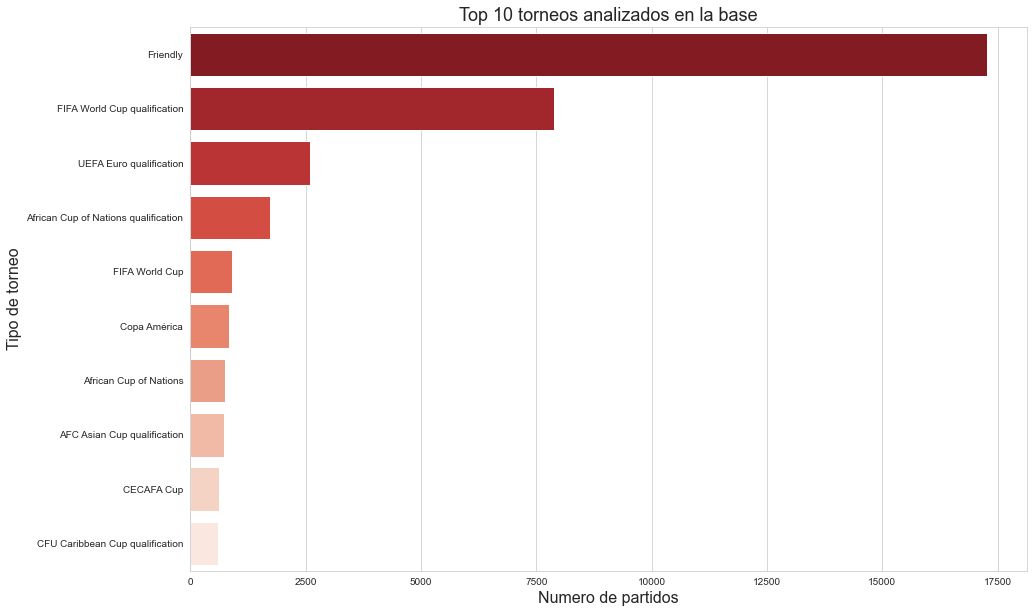

In [6]:
#Graficando los torneos analizados en la base

tournament = matches['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tipo de torneo', size=16)
ax.set_xlabel('Numero de partidos', size=16)
ax.set_title("Top 10 torneos analizados en la base", fontsize=18)

In [13]:
# creando un dataframe tanto para los equipos de local como de visitante
home = matches[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = matches[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
# uno las bases 
team_score = home.append(away).reset_index(drop=True)
# group by de agregacion
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})

del home, away

Text(0.5, 1.0, 'TOP 10 OF GOAL AVERAGE PER MATCH')

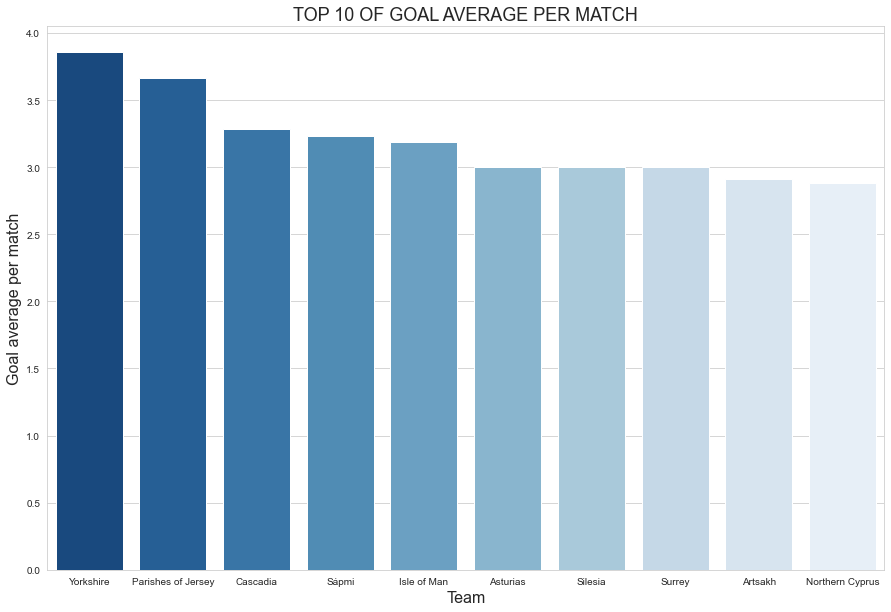

In [14]:
#Grafico

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:10]
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

Text(0.5, 1.0, 'TOP 10 OF NUMBER OF MATCHES')

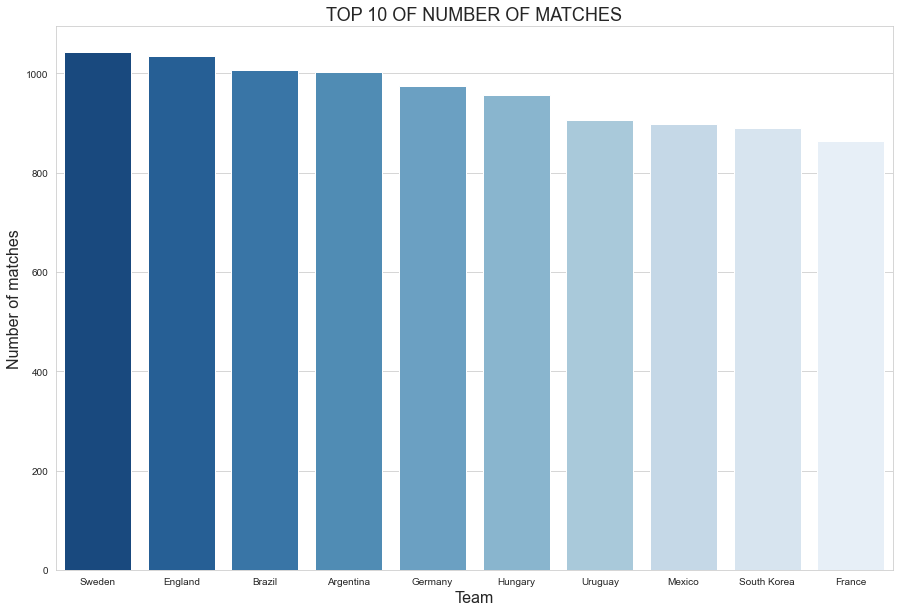

In [15]:
#Grafico

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_matches', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_matches", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of matches', size=16)
ax.set_title("TOP 10 OF NUMBER OF MATCHES", fontsize=18)

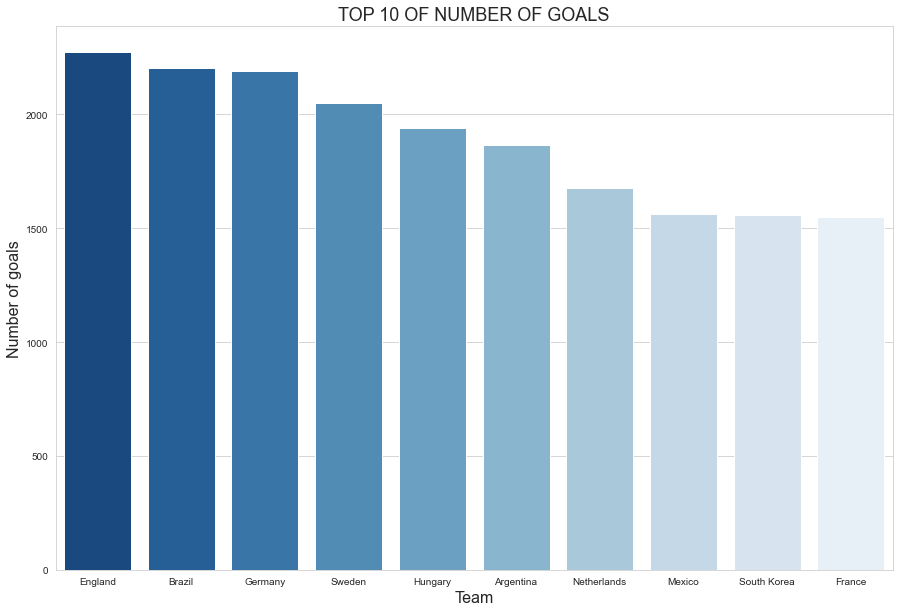

In [16]:
#Grafico

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

del plt_data, country_info

In [17]:
#Promedios

means = matches[['home_score','away_score']].mean()
means

home_score    1.742544
away_score    1.182666
dtype: float64

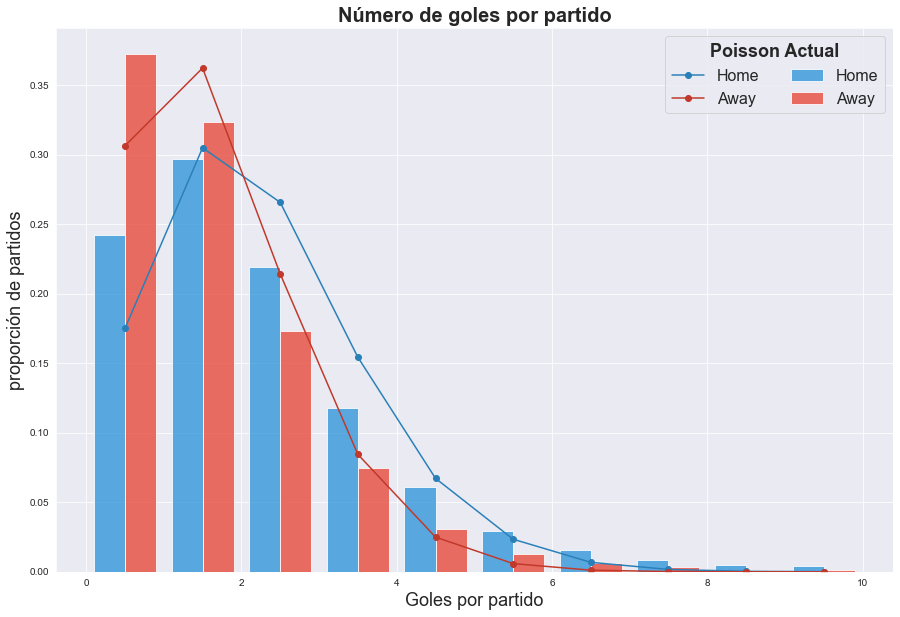

In [18]:
#Distribucion de poisson

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(k, means[j]) for k in range(10)] for j in range(2)])
# plot histogram of actual goals
plt.hist(matches[['home_score', 'away_score']].values, range(11), alpha=0.8, label=['Home', 'Away'],density=True, color=["#3498db", "#e74c3c"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#2980b9')
pois2, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#c0392b')

leg=plt.legend(loc='upper right', fontsize=16, ncol=2)
leg.set_title("Poisson Actual", prop = {'size':'18', 'weight':'bold'})

#plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(11)])
plt.xlabel("Goles por partido",size=18)
plt.ylabel("proporción de partidos",size=18)
plt.title("Número de goles por partido",size=20,fontweight='bold')
plt.show()

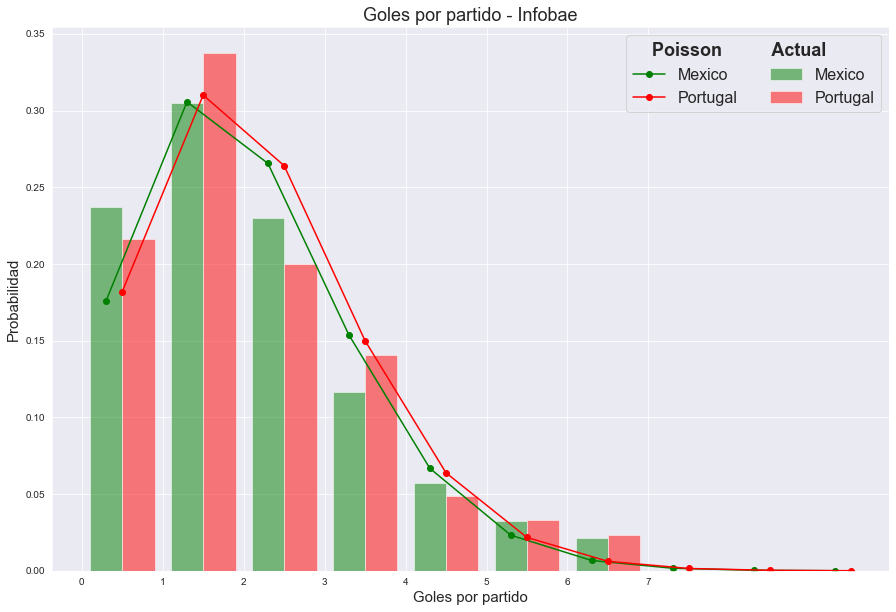

In [19]:
#Poisson con enfrentamiento de dos equipos

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
team1, team2 = "Mexico", "Portugal"
matches_t1 = team_score[team_score['team'] == team1]
matches_t2 = team_score[team_score['team'] == team2]
    
mean_t1 = matches_t1['score'].mean()
mean_t2 = matches_t2['score'].mean()

# construct Poisson  for each mean goals value
poisson_pred_t1 = [poisson.pmf(k, mean_t1) for k in range(10)]
poisson_pred_t2 = [poisson.pmf(k, mean_t2) for k in range(10)]

# plot histogram of actual goals
plt.hist([matches_t1['score'].values, matches_t2['score'].values], range(8), alpha=0.5,
         label=[team1, team2],density=True, color=["green", "red"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.7 for i in range(1,11)], poisson_pred_t1,
                  linestyle='-', marker='o',label=team1, color = 'green')
pois2, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred_t2,
                  linestyle='-', marker='o',label=team2, color = 'red')

leg=plt.legend(loc='upper right', fontsize=16, ncol=2)
leg.set_title("Poisson          Actual      ", prop = {'size':'18', 'weight':'bold'})

#plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(11)])
plt.xlabel("Goles por partido",size=15)
plt.ylabel("Probabilidad",size=15)
plt.xticks(range(8))
plt.title("Goles por partido - Infobae",size=18)
plt.show()